In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("IBM_HRattrition.csv",sep=',')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# EDA

In [3]:
df.shape  # checking the rows and cols count

(1470, 35)

In [4]:
df.columns # checking the various cols

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.dtypes # checking the datatypes of cols

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Key Observations here

1. Mean and median in most of features are almost same.
2.  But , there is huge difference in 75% and max values in some features. 
Few Outliers may exist

In [7]:
# checking the information about the not-null, datatypes, rows and cols count of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull() # checking for any null values

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum() # null  values column wise counts

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

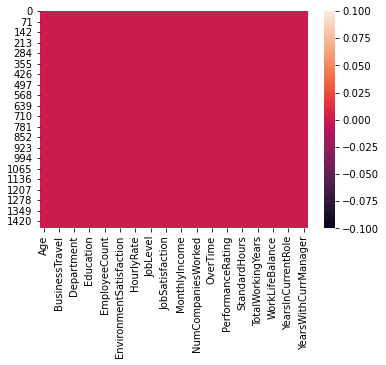

In [10]:
sns.heatmap(df.isnull())

heatmap shows there are no null values in the data

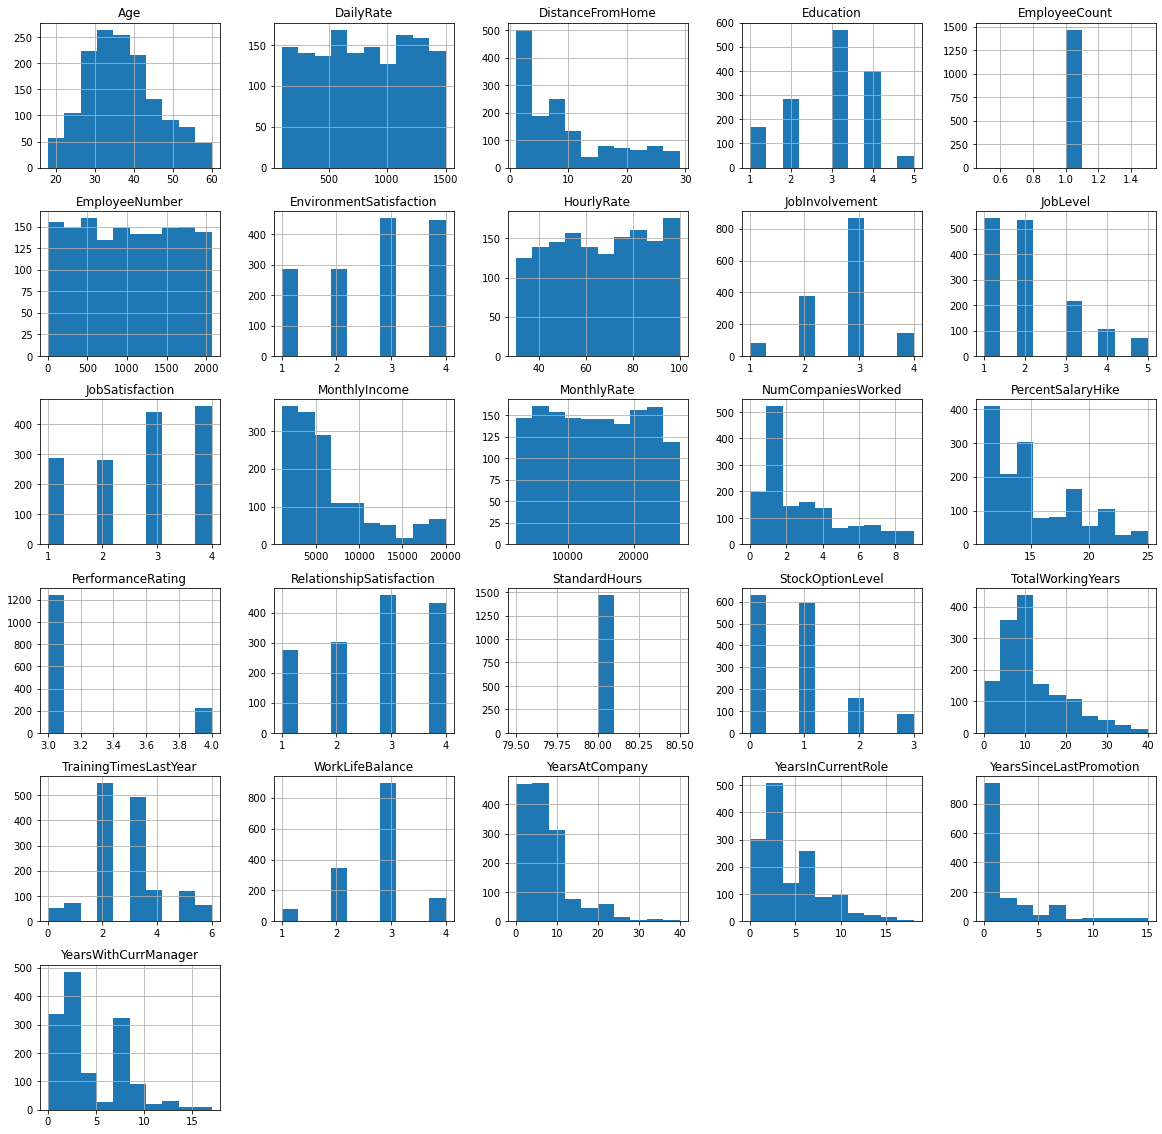

In [11]:
df.hist(figsize=(20,20))
plt.show()

Observations here:
1. many features like age,monthly income,years at company are rightly skewed.
2. Also, StandardHours and Employeecount has single value common for employees

In [12]:
df_cor=df.corr()
df_cor

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

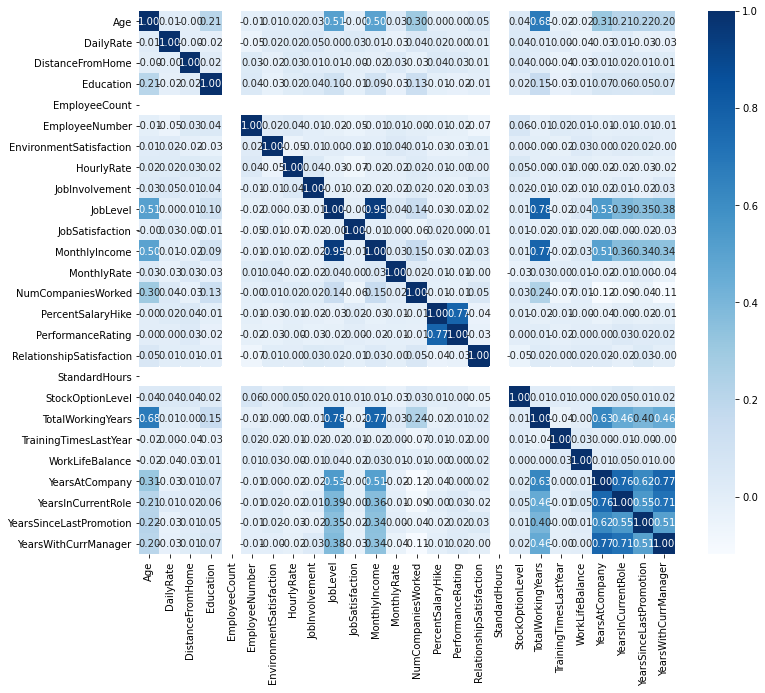

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f')

Key Observations here:
1. YearsAtCompany	YearsInCurrentRole	YearsSinceLastPromotion	YearsWithCurrManager are positively correlated
2. Daily Rate and Monthly rate are negatively correlated variables.
3. EmployeeCount and StandardHours have missing(NaN) values

In [14]:
# dropping some irrelevant variables to target variable Attrition

In [15]:
df = df.drop(['EmployeeNumber', 'EmployeeCount','StandardHours', 'Over18'], axis=1)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# transforming nominal values to numerical so as to get the better bivariate analysis and correlation between variables.

#transforming the categorical variables to numerical for data modelling using LabelEncoder



In [16]:
df['Attrition'] = df['Attrition'].apply(lambda row: 1 if row=='Yes' else 0)
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [17]:
# extracting category cols and numerical cols
cat_col =[]
for col, i in df.drop(['Attrition'], axis=1).iteritems():
    if i.dtype == 'object':
        cat_col.append(col)
num_col = df.drop(['Attrition'], axis=1).columns.difference(cat_col)

In [18]:
cat_col # category columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [19]:
num_col # numerical columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
list1=['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


# Data Visualization

Univariate Analysis

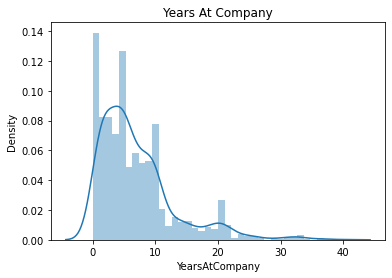

In [22]:
sns.distplot(df["YearsAtCompany"])
plt.title("Years At Company")
plt.show()

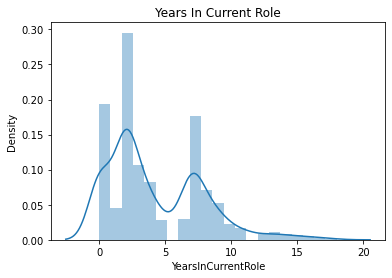

In [23]:
sns.distplot(df["YearsInCurrentRole"])
plt.title("Years In Current Role")
plt.show()

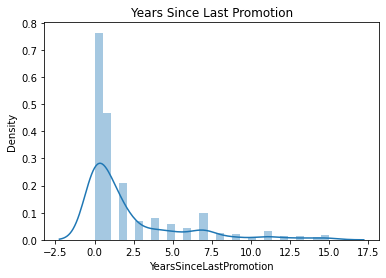

In [24]:
sns.distplot(df["YearsSinceLastPromotion"])
plt.title("Years Since Last Promotion")
plt.show()

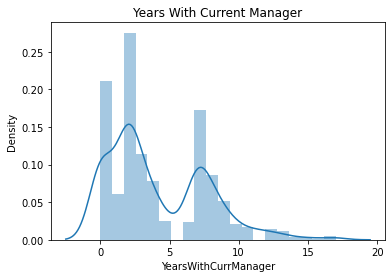

In [25]:
sns.distplot(df["YearsWithCurrManager"])
plt.title("Years With Current Manager")
plt.show()

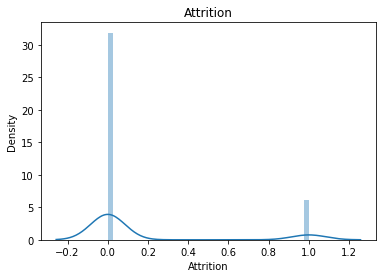

In [26]:
sns.distplot(df["Attrition"])
plt.title("Attrition")
plt.show()

In [27]:
#univariate analysis suggests the variables are positively skewed and not normalised

In [28]:
# bivariate analysis 
#As the target variable has values 0 and 1

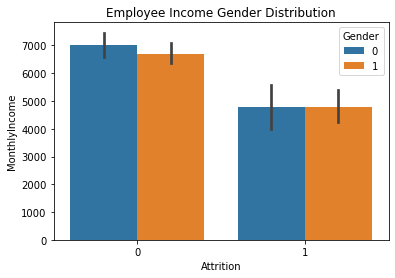

<Figure size 720x720 with 0 Axes>

In [29]:
sns.barplot(x='Attrition',y='MonthlyIncome',hue='Gender',data=df)
plt.title("Employee Income Gender Distribution")
plt.figure(figsize=(10, 10))
plt.show()

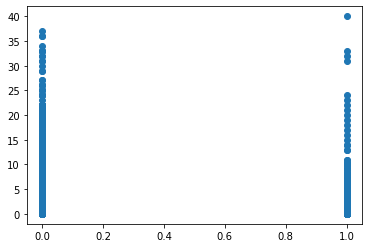

In [30]:
plt.scatter(df["Attrition"],df["YearsAtCompany"]) # correlation when target variable is region

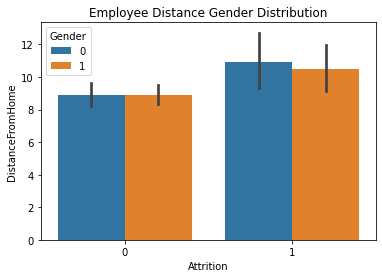

In [31]:
sns.barplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=df)
plt.title("Employee Distance Gender Distribution")
plt.show()

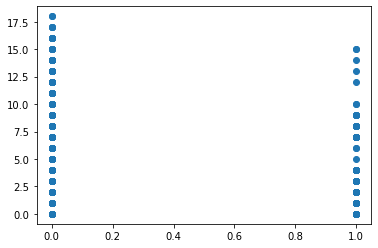

In [32]:
plt.scatter(df["Attrition"],df["YearsInCurrentRole"])# correlation when target variable is region

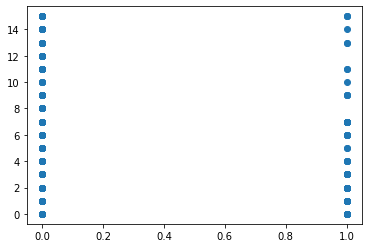

In [33]:
plt.scatter(df["Attrition"],df["YearsSinceLastPromotion"])# correlation when target variable is region

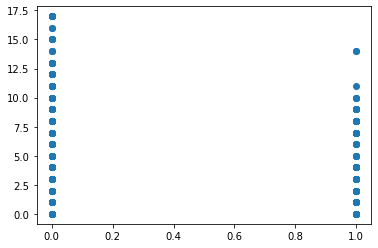

In [34]:
plt.scatter(df["Attrition"],df["YearsWithCurrManager"])# correlation when target variable is region

In [35]:
# Analysis of parameter vs Attrition

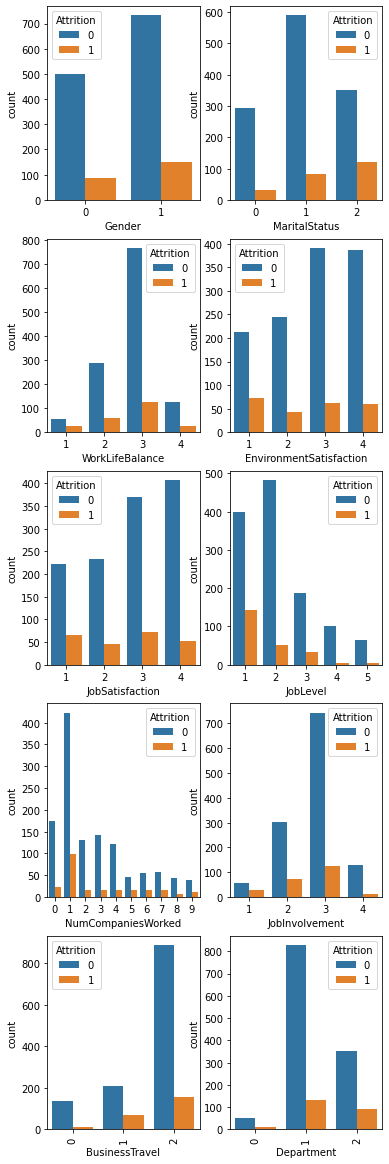

In [36]:
total_records= len(df)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel",'NumCompaniesWorked',"JobInvolvement","BusinessTravel",'Department']

j=0
for i in columns:
    j +=1
    plt.subplot(5,2,j)
    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    if(j==9 or j== 10):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
    
# Custom the subplot layout
plt.subplots_adjust(bottom=0.1, top=4)
plt.show()

# plotting the outliers

<AxesSubplot:>

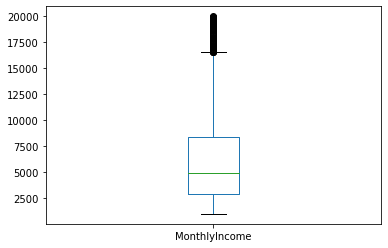

In [37]:
df["MonthlyIncome"].plot.box()

<AxesSubplot:>

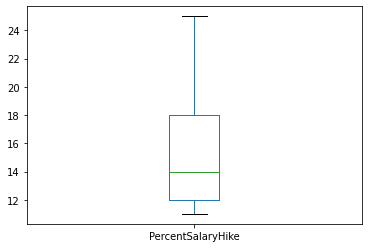

In [38]:
df["PercentSalaryHike"].plot.box()

<AxesSubplot:>

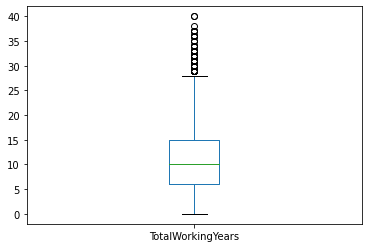

In [39]:
df["TotalWorkingYears"].plot.box()

<AxesSubplot:>

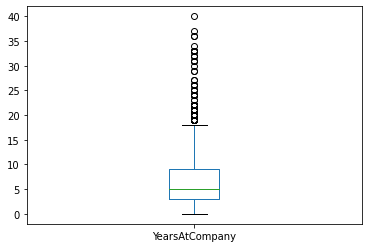

In [40]:
df["YearsAtCompany"].plot.box()

<AxesSubplot:>

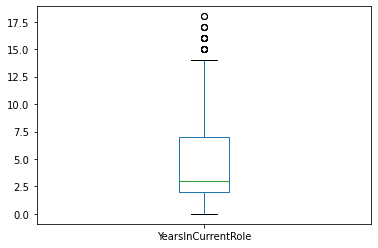

In [41]:
df["YearsInCurrentRole"].plot.box()

All the above boxplot shows the outliers are present 

In [42]:
from scipy.stats import zscore

In [43]:
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430]), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 27, 30, 29, 28, 28,

In [44]:
df_new=df[(z<3).all(axis=1)]

In [45]:
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [46]:
# dividing the x varaibles features from y variable target (Attrition)
x=df_new.drop(columns=["Attrition"])
y=df_new[["Attrition"]]

In [47]:
print(x.shape ,"\t" , y.shape)

(1387, 30) 	 (1387, 1)


# To check the distribution of skewness

In [48]:
df_new.skew()  # shows  very little skewness

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [49]:
# removing skewness by transforming data
from sklearn.preprocessing import power_transform

In [50]:
x=power_transform(x,method='yeo-johnson')

# Model Training

Logistic REgression

In [51]:
# scaling the input variable
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
scaledX=mc.fit_transform(x)

In [52]:
# importing our model libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [54]:
best_rstate=0
accuracy=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=i,stratify=y)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if(tempaccu>accuracy):
        accuracy=tempaccu
        best_rstate=i
        
print("Best Accuracy",accuracy*100, "Random state",best_rstate)        

Best Accuracy 91.06628242074927 Random state 44


In [55]:
# breaking out input and output variable into train and test data
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.22,random_state=44,stratify=y)

In [56]:
#using algorithms in for loops
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Accuracy score of " , m , "is " , accuracy_score(y_test,y_pred))
    print("confusion matrix of " , m , "is \n",confusion_matrix(y_test,y_pred))
    print("classification report of " , m, "is \n",classification_report(y_test,y_pred))
    print("**********************************************************************\n")

Accuracy score of  LogisticRegression() is  0.8986928104575164
confusion matrix of  LogisticRegression() is 
 [[251   4]
 [ 27  24]]
classification report of  LogisticRegression() is 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.86      0.47      0.61        51

    accuracy                           0.90       306
   macro avg       0.88      0.73      0.77       306
weighted avg       0.90      0.90      0.89       306

**********************************************************************

Accuracy score of  GaussianNB() is  0.8594771241830066
confusion matrix of  GaussianNB() is 
 [[231  24]
 [ 19  32]]
classification report of  GaussianNB() is 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       255
           1       0.57      0.63      0.60        51

    accuracy                           0.86       306
   macro avg       0.75      0.77    

# Conclusion

LogisticRegression is performing best among all above with accuaracy score .90

# hyper parameter tuning

In [57]:
grid={"C":[1,10], "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr=LogisticRegression()
clf=GridSearchCV(lr,grid,cv=10)
clf.fit(x_train,y_train)

print("best parameters ",clf.best_params_)
print("accuracy :",clf.best_score_)

best parameters  {'C': 1, 'penalty': 'l2'}
accuracy : 0.8658511722731905


In [58]:
# Logistic Reression with best parameters 
lr=LogisticRegression(C=1,penalty='l2',random_state=44)
lr.fit(x_train,y_train)
lr.score=(x_train,y_train)
predlr=lr.predict(x_test)
print("accuracy score",accuracy_score(y_test,predlr))
print("confusion matrix\n",confusion_matrix(y_test,predlr))
print("classification report",classification_report(y_test,predlr))

accuracy score 0.8986928104575164
confusion matrix
 [[251   4]
 [ 27  24]]
classification report               precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.86      0.47      0.61        51

    accuracy                           0.90       306
   macro avg       0.88      0.73      0.77       306
weighted avg       0.90      0.90      0.89       306



In [59]:
# cross validating Logistic Regression
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,scaledX,y,cv=4,scoring='accuracy')
print("Cross Validation Score : ", score,"\n")
print("Mean" , score.mean())
print("Standard Deviation" , score.std())

Cross Validation Score :  [0.87319885 0.85302594 0.870317   0.86705202] 

Mean 0.8658984524662258
Standard Deviation 0.007743573818829911


In [60]:
from sklearn.metrics import roc_curve,roc_auc_score

In [61]:
# Using 10 fold Cross-Validation to train Logistic Regression Model
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=44)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.813 (0.068)


In [63]:
# Create ROC Graph
#lg=LogisticRegression()
y_pred_prob= lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

In [64]:
print(fpr,"\n",tpr,"\n",thresholds)

[0.         0.         0.         0.00392157 0.00392157 0.01568627
 0.01568627 0.02745098 0.02745098 0.03137255 0.03137255 0.03921569
 0.03921569 0.0745098  0.0745098  0.09411765 0.09411765 0.10588235
 0.10588235 0.11372549 0.11372549 0.15686275 0.15686275 0.16470588
 0.16470588 0.17254902 0.17254902 0.19607843 0.19607843 0.25098039
 0.25098039 0.30980392 0.30980392 0.36470588 0.36470588 0.37254902
 0.37254902 0.53333333 0.53333333 0.79607843 0.79607843 0.81568627
 0.81568627 0.85882353 0.85882353 1.        ] 
 [0.         0.01960784 0.21568627 0.21568627 0.39215686 0.39215686
 0.49019608 0.49019608 0.54901961 0.54901961 0.60784314 0.60784314
 0.62745098 0.62745098 0.66666667 0.66666667 0.70588235 0.70588235
 0.7254902  0.7254902  0.76470588 0.76470588 0.78431373 0.78431373
 0.80392157 0.80392157 0.82352941 0.82352941 0.84313725 0.84313725
 0.8627451  0.8627451  0.88235294 0.88235294 0.90196078 0.90196078
 0.92156863 0.92156863 0.94117647 0.94117647 0.96078431 0.96078431
 0.98039216 0.

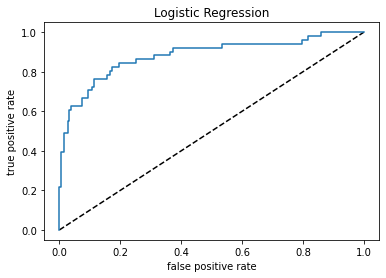

In [65]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Logistic Regression")
plt.show()

In [66]:
auc_score=roc_auc_score(y_test,predlr)

In [67]:
auc_score 

0.7274509803921569

# Saving the model- Serialization

In [68]:
# saving the prediction model

import pickle
filename="IBMAttrition.pkl"
pickle.dump(predlr,open(filename,'wb'))